# Dimensionality Reduction Techniques on Python - 1

In many machine learning applications, thousands or even millions of input variables are used during training. The number of input variables (features), also referred to as dimensionality of data, may make training extremely slow. Moreover, an extremely high number of features can also reduce the chance of finding the global minima during optimization. High-dimensional datasets are likely to contain instances that are far away from each other in their feature space. This sparse data would make predictions less reliable than they would be in lower dimensions. This impact of high-dimensional data is generally referred to as the Curse of Dimensionality.

- The more dimensions the training set has, the greater the risk of overfitting it. - [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Hopefully, we can make use of techniques that reduce the number of features. These techniques are a part of a general study field named **Dimensionality Reduction** which is not only used for improving training performance but also used for visualization of high-dimensional data.

Dimensionality reduction techniques transform the data from a high-dimensional space into a low-dimensional space. By doing so, they reduce the degrees of freedom in our data which makes the model more robust against overfitting. This may even increase the generalization performance of the model by filtering out noise and unnecessary details. On the other hand, dimensionality reduction also causes some information loss, hence, the amount of lost information should be carefully considered.

One of the reasons why dimensionality reduction often works well is that, in general cases, training instances do not follow a gaussian distribution ( in other words, they are not uniformly distributed) in all dimensions. As a result, most of the training instances lie within a lower-dimensional subspace of the actual high-dimensional space. Thanks to dimensionality reduction techniques, we can compress our data in this lower-sub space and use our model on the "essence" of the data.

- When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. This is called dimensionality reduction. - [Murphy, K. P. (2022)](https://mitpress.mit.edu/9780262046824/probabilistic-machine-learning/)

Let's explore these techniques...

## Projection

One of the basic techniques that we can use for dimensionality reduction is projection. Just like we are projecting a vector $u$ onto $v$ by using the equation below $$proj_vu=\left(\frac{u\cdot v}{\left|\left|v\right|\right|^2}\right)v$$. 

we can project high-dimensional data perpendicularly to a lower dimension. However, in many cases, this projection will not be sufficient to represent the data well in the lower dimensional space because subspace data may twist and turn. In other words, the data may be so complex that perpendicular projection would not be sufficient to map the data into a lower space.

Let's see such a case. I will construct a Swiss Roll and reduce the dimensionality.

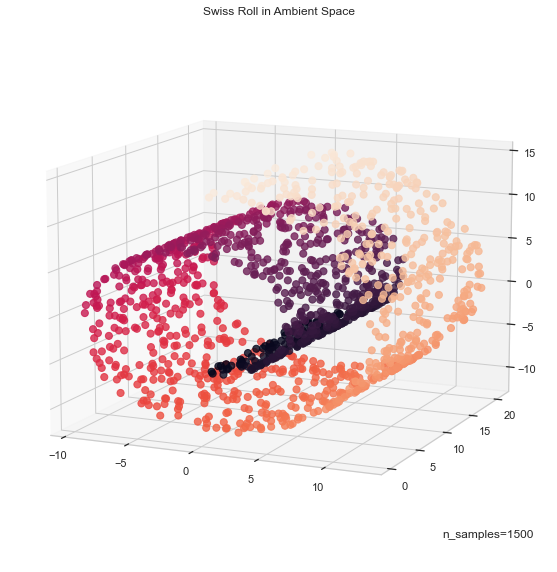

In [1]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns


sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=42)
sns.set_theme(style="whitegrid")


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)    

I will use Locally Linear Embedding (LLE), one of the techniques that we will learn later in this notebook series, and I will show an example of how the lower-dimensional representation would look if we used the perpendicular projection and LLE.

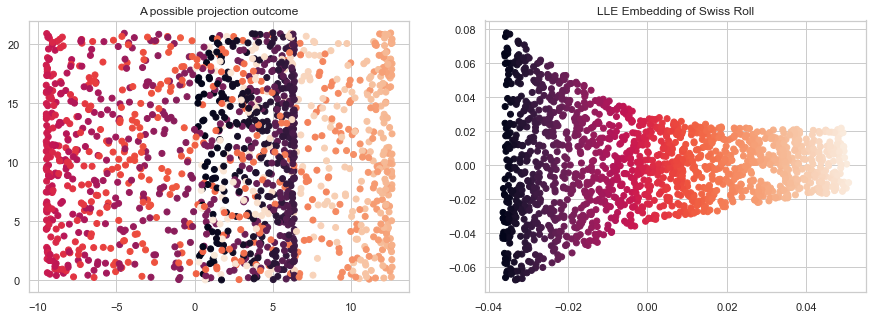

In [2]:
sr_lle, sr_err = manifold.locally_linear_embedding(
    sr_points, n_neighbors=12, n_components=2
)

fig, axs = plt.subplots(figsize=(15,5), ncols=2)
axs[1].scatter(sr_lle[:, 0], sr_lle[:, 1], c=sr_color)
axs[1].set_title("LLE Embedding of Swiss Roll")
axs[0].scatter(sr_points[:, 0], sr_points[:, 1], c=sr_color)
_ = axs[0].set_title("A possible projection outcome")

In the left plot, different layers of Swiss Roll are squashed together, whereas, in the right one it looks like we successfully unroll the Swiss Roll. In short, it is important which dimensionality reduction technique you use for finding the lower-dimensional representation. In this notebook serie, we will learn more about the following dimensionality reduction techniques.

1. Principal Component Analysis
2. Linear Discriminant Analysis
3. Isomap
4. Locally Linear Embedding
5. Laplacian Eigenmaps
6. t-SNE
7. UMAP



**Additional Sources:** You can find a good explanation of vector projection and its importance in the following materials:
 1.  [Vector Projections : Data Science Basics](https://www.youtube.com/watch?v=X78tLBY3BMk)
 2. [About Vector projection](https://medium.com/intuition/about-vector-projection-e1417a9ccd28)

# Principal Component Analysis (PCA)

Principal Component Analysis is a dimensionality reduction technique that tries to reduce the dimensionality of a large number of interrelated features while preserving the variance as much as possible. The algorithm does this by finding the directions (principal components) that maximize the variance while projecting an entire set of data onto a different subspace.

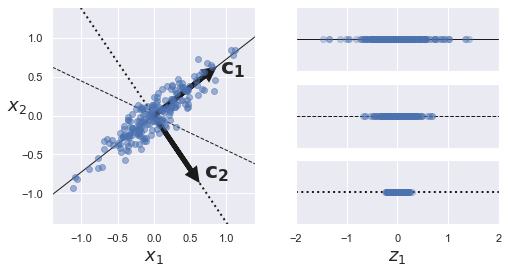

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
sns.set_theme()
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

The figure above is an illustration of Principal Component Analysis. The figure on right shows the variance each vector captures. The algorithm tries to preserve as much variance as possible on principal components $C_1$, $C_2$ and the other vector. $C_1$ is the first principal component and it accounts for the most variance, orthogonal to $C_1$, we have $C_2$ which accounts for the second most variance. And lastly, the other vector captures the east amount of variances.

The code above is taken from [Géron, A. (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### Mathematical Details Behind PCA

We will go through the algorithm step by step.

Let $X$ be a data matrix which has independent expirements constructed as a row vector where each row vector is a individual expirement.

$$X=\begin{pmatrix}-&-&x_1&-&-\\ -&-&x_2&-&-\\ -&-&x_3&-&-\\ -&-&.&-&-\\ -&-&.&-&-\\ -&-&x_n&-&-\end{pmatrix}$$

#### 1. Compute the row-wise mean and construct an average matrix:

The mean $\bar{x}$ is calculated by the following

$$\bar{x}_j\:=\:\frac{1}{n}\sum _{i=1}^n\:X_{ij}$$

and the mean matrix is

$$\bar{X}=\begin{pmatrix}1\\ 1\\ .\\ .\\ .\\ 1\end{pmatrix}\cdot \bar{x}$$

#### 2. Subtract the mean matrix from data matrix to make the data mean-centered:

$$B=X-\bar{X}$$

#### 3. Calculate the covariance matrix of B:
**Covariance:** Covariance is the measure of variance between two variable and it is defined by the following equation.

$$cov\left(X,Y\right)=E\left(\left(X-\mu \right)\left(Y-\nu \right)\right)\:where\:\:E\left(X\right)=\mu \:\:and\:\:E\left(Y\right)=\nu $$

We can hold all the possible combinations of covariance in a matrix called the covariance matrix which is denoted by $\sum $. In machine learning lingo, covariance matrix is also denoted by C and given by the following:

$$C=\frac{1}{n-1}B^TB$$

#### 4. Calculate the Eigen decomposition:

In this step, we need to calculate the eigenvectors and eigenvalues. To do that we will use Singular Value Decompisition on covariance matrix.

### Eigenvectors, Eigenvalues and Singular Value Decomposition (Feel free to skip if you already know)

**Eigenvectors and Eigenvalues:** An eigenvector or sometimes also referred as to a characteristic vector of a linear transformation is a nonzero vector that does not change its orientation when a linear transformation is applied to them. Eigenvectors have a corresponding scaler value that is associated with them, this value is called the eigenvalue.


You can learn more about these two concepts by watching these two videos: 

1. [Eigenvectors and eigenvalues](https://www.youtube.com/watch?v=PFDu9oVAE-g&t=514s)
2. [Eigenvalues & Eigenvectors : Data Science Basics](https://www.youtube.com/watch?v=glaiP222JWA)  

#### Singular Value Decomposition:

Let's say, we have the data matrix below.

$$X=\begin{pmatrix}|&|&|&|&|\\ _|&|&|&|&|\\ x_1&x_2&.&.&x_m\\ |&|&|&|&|\\ |&|&|&|&|\end{pmatrix}$$

SVD states that any matrix A can be factorized as 

 $$A=U\:\Sigma \:V^T$$

where U and V are orthogonal matrices and $\Sigma$ is a diagonal matrix.

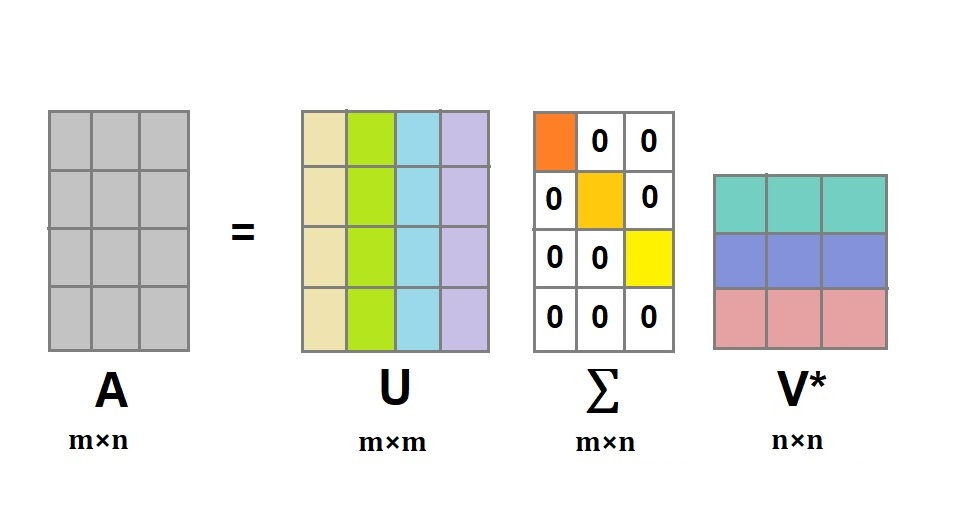

In the illustration above, $U$ is called left singular vectors, $V$ is called right singular vectors and $\Sigma$ is called singular values.

1. The matrix $U$ is hierarchically arranged. Each element has a more descriptive power on the variance of $A$ than the element that comes after it.

2. $U$ and $V$ matrices are unitary which means  $U^TU=UU^T=\:I\:and\:V^TV=VV^T=I$ and they are orthonormal eigenvectors.

3. $\Sigma$ is diagonal and hierarchically arranged so elements have decreasing magnitude as $U$.

4. In general, the first column of $U$ and $V$ corresponding to $\Sigma_1$ has more importance in describing the variance in the matrix than the second column and this goes so on and so forth. The relative importance of columns of $U$ and columns of $V$ are given by the corresponding singular values in $\Sigma$.

You can learn more about SVD such as "How to calculate these matrices?" by watching the following videos:

1. [Singular Value Decomposition (SVD): Mathematical Overview](https://www.youtube.com/watch?v=nbBvuuNVfco)
2. [Singular Value Decomposition (SVD): Matrix Approximation](https://www.youtube.com/watch?v=xy3QyyhiuY4)

**Let's turn back to PCA:**

We need to calculate eigenvalues and vectors of correlation matrix C. By calculating the eigenvalue decomposition of C, we will get the following matrices.

$$CV=VD$$ where $V$ is eigenvectors and $D$ is eigenvalues.

We can find the principal components by multiplying the eigenvectors with the mean-subtracted matrix B

$$T=BV$$ where $T$ contains the principal components.

#### 5. Using SVD for getting eigenvalue decomposition:

It turns out that principal components (T) are also equal to the left singular matrix $\Sigma$. In other words, by using Singular Value Decomposition on mean-subtracted matrix B we can directly calculate the principal components.

$$T=B\cdot V\:=U\cdot \Sigma $$

The singular values in $\Sigma$, as we talked about before, give us information about the amount of variance of the dataset that the calculated principal components capture. We can select the number of principal components that we want to use by computing how much of the variance is captured by these principal components ( Remember that $\Sigma$ is diagonal and hierarchically arranged). The eigenvalues ($\lambda$) can be calculated by given:

$$\lambda =\sigma ^2$$

The square of singular values is equal to variance, in other words, eigenvalues. Then we can calculate the variance eigenvectors captured by summing the singular values of the number of principal components that we want to use divided by the sum of all the singular values.

$$\frac{\sum _{n=1}^k\left(\lambda _k\right)}{\sum _{i=1}^m\left(\lambda _m\right)}$$

## Solving with Lagrange Multipliers

The SVD approach above is one of the ways that we can use to find eigenvalues/eigenvectors that maximize the variance. This is also the technique that is implemented in the Scikit-learn. However, we can also solve this problem with Lagrange multipliers.

I will not introduce the concept of Lagrange Multipliers since I have already talked about it before in my SVM notebooks. If you do not know about them, you can check my SVM notebooks or you can also grasp the basic idea by watching this video [Lagrange Multipliers : Data Science Basics](https://www.youtube.com/watch?v=6oZT72-nnyI)


For finding the eigenvalues that maximizes the variance, we need to slightly change some of the terms that we defined above.

Let's rewrite the covariance matrix

$$C = \frac{1}{n} \sum_{i=1}^n \left(\mathbf{x}_i - \mu\right)\left(\mathbf{x}_i -\mu\right)^⊤
$$

This definition and the one I share before Lagrange multipliers part is actually the same. In this definition, we just added the mean subtraction part.

When we do the mean subtraction we get the following:

$$C = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \mathbf{x}_i^⊤$$

Our aim is again to maximize variance and one thing that we need to add here is that we have a constraint. This maximization problem of variance $V$ is subject to constraint: $$\|\mathbf{v}\|=1$$

Now we can solve this optimization problem by using Lagrange Multipliers. 

We want to solve the following Lagrangian problem

$$\mathcal{L}(\mathbf{v},\lambda) = \mathbf{v}^⊤ C \mathbf{v} - \lambda(\mathbf{v}^⊤ \mathbf{v}-1)$$

which is subject to

$$\|\mathbf{v}\|=1 \Leftrightarrow \mathbf{v}^⊤\mathbf{v} = 1$$

Let's take the derivatives with respect to each parameter and set them to zero

$$\frac{\partial L}{\partial v}\:=2v^⊤\:C\:-\:2\lambda \:v^⊤\:=\:0$$

$$\frac{\partial L}{\partial \lambda }\:=v^⊤\:v\:-\:1\:=\:0$$

From the first derivation, we end up having the following equivalance

$$Cv=\lambda v$$

Here, $v$ is the eigenvector of the covariance matrix C, and $\lambda$ is the Lagrange multiplier. We found the optimal direction onto that we should project the data to have maximum variance, which is an eigenvector of covariance matrix.
    
Since we know that $v^Tv=1$, let's multiply the both sides with $v^T$ and obtain

$$v^TCv=\lambda \:$$

To get the maximized value for the variance of the projected data, we need to pick the eigenvector that corresponds to the largest eigenvalue of the covariance matrix. So the largest/first eigenvalue of the covariance matrix will be the one that is associated with the eigenvector which accounts for the maximum variance, and the second largest eigenvalue will be associated with the second eigenvector that accounts for the most variance after the first eigenvector. We can select the amount of variance that we want to preserve by picking these eigenvalues $\lambda$.


So in the end, both solutions get us to the same result.

**Additional Sources:**

1. [Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=fkf4IBRSeEc)
2. [Principal Component Analysis (PCA)](https://www.youtube.com/watch?v=FD4DeN81ODY)
3. [Principal Component Analysis (The Math) : Data Science Concepts](https://www.youtube.com/watch?v=dhK8nbtii6I)
4. [Implementing a Principal Component Analysis (PCA)](https://sebastianraschka.com/Articles/2014_pca_step_by_step.html#sc_matrix)
5. [Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA)](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
6. [Machine Learning & Linear Algebra — Eigenvalue and eigenvector](https://jonathan-hui.medium.com/machine-learning-linear-algebra-eigenvalue-and-eigenvector-f8d0493564c9)
7. [Principal component analysis with Lagrange multiplier](https://ekamperi.github.io/mathematics/2020/11/01/principal-component-analysis-lagrange-multiplier.html)
8. Nice book: [Data Driven Science & Engineering](http://databookuw.com/databook.pdf)

## Implementing PCA with Scikit-learn

Now let's implement PCA using Sklearn. I will use `fetch_openml()` to get MNIST Numbers dataset and then apply PCA() on this data.

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

Getting the data:

In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [6]:
X = mnist["data"]
y = mnist["target"]

Firstly, let's apply PCA with two principal components.

In [7]:
pca = PCA(n_components=2)
X2Comp= pca.fit_transform(X)

Let's print the first two principal components and visualize them with `seaborn.scatterplot()`.

In [8]:
X2Comp

array([[ 122.25717123, -316.22958312],
       [1010.49460838, -289.95517438],
       [ -58.99396767,  393.70322455],
       ...,
       [-271.50801746,  590.07388857],
       [-310.22739392, -116.73902115],
       [1058.8619196 ,  -83.39099648]])

<AxesSubplot:>

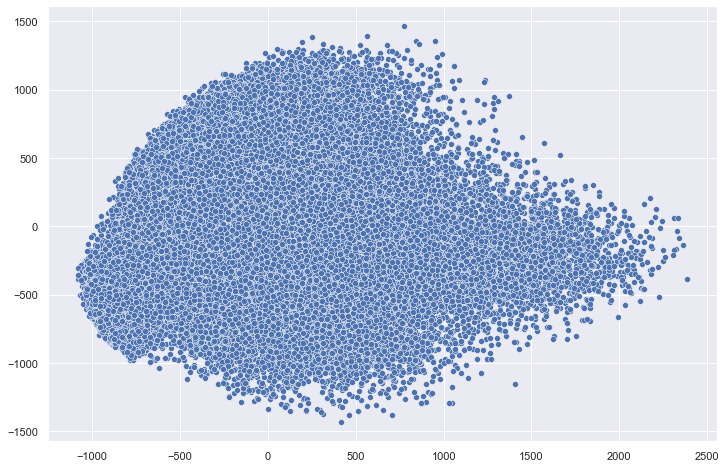

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X2Comp[:, 0], y=X2Comp[:, 1],)

We can find the variance that is explained by these two principal components with `explained_variance_ratio_` method.

In [10]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [11]:
1 - pca.explained_variance_ratio_.sum()

0.8309843949141009

In the end, the first two principal components only account for only %17 of the total variance. Hence, we lost a big part of our data. Let's now apply inverse transform and get the original data.

In [12]:
pca_inv = pca.inverse_transform(X2Comp)

Is the recovered data the same as the original one ?

In [13]:
np.allclose(pca_inv, X)

False

No of course it is not... Since during the projection of the data we lost some information, the recovered data is not the same as the original one. We can calculate the reconstruction error by the following way:

In [14]:
np.mean(np.sum(np.square(pca_inv - X), axis=1))

2850255.2410297976

Instead of passing the number of principal components we want, we can directly pass the variance that we want to preserve.

In [15]:
pca = PCA(n_components=0.95)
X_var = pca.fit_transform(X)

In [16]:
pca.n_components_

154

In [17]:
np.sum(pca.explained_variance_ratio_)

0.9503499702078612

Using 154 principal components we can preserve %95 percent of the variance in the data. Let's plot an elbow curve to see how many principal components we need to preserve all the variance.

In [18]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

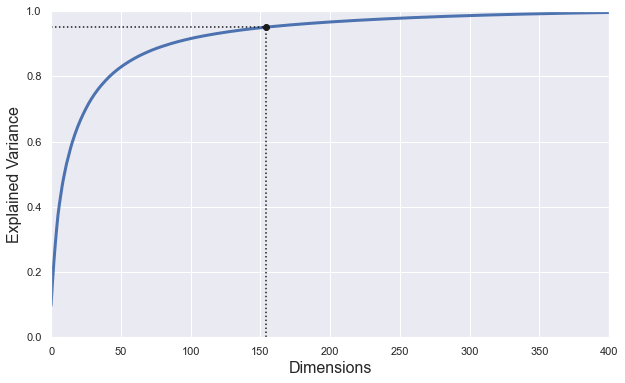

In [19]:
plt.figure(figsize=(10,6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions",fontsize=16)
plt.ylabel("Explained Variance",fontsize=16)
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Let's have an quick example: I will apply PCA with 154 principal components again and then recover the original space with `pca.inverse_transform()`.  Afterwards, I will plot both the recovered MNIST Numbers and the original one to clearly show how much data we lost during reconstruction.

In [20]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [21]:
def plot_digits(instances, images_per_row=5, **options): # This function is taken from Géron, A. (2019)
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplot.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

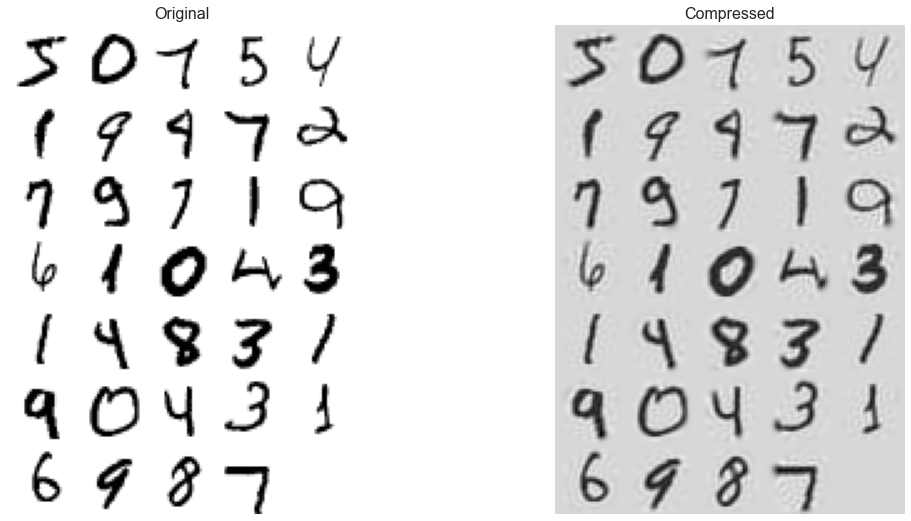

In [22]:
plt.figure(figsize=(18, 9))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


**svd_solver:** `svd_solver()` is an important parameters that defined how SVD will be computed. By default, it is set to **auto**: In this setting,

*  if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. 

Randomized PCA uses a stochastic algorithm to approximate SVD which generally yields a quicker running time. Check out the PCA documentation of Scikit-learn to learn more about `svd_solver()` as well as the other algorithms. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Let's use both `svd_solver="randomized"` and `svd_solver="full"` to compare their running time.

In [23]:
import timeit

start = timeit.default_timer()

Rand_PCA=PCA(n_components=154,svd_solver="randomized")
X_reduced=Rand_PCA.fit_transform(X)


stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  6.109037199999989


In [24]:
start = timeit.default_timer()

Full_PCA=PCA(n_components=154,svd_solver="full")
X_reduced=Full_PCA.fit_transform(X)


stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  12.851493300000001


Running time is not long for MNIST dataset. However, in a case which we have a much larger dataset, Randomized PCA can save a considerable time.

## Incremental PCA

One of the problems about PCA is the it requires the whole training set to fit in memory for the algorithm to run. In a scenario which we have a very large dataset that does not fit in memory, we can use Incremental PCA. Incremental PCA allows us to use the algorithm with mini-batches, we feed the algorithm with one of mini-batches at a time by using `partial_fit()` method and run the algorithm over all the mini-batches.



In [25]:
n_batches = 25
inc_pca = IncrementalPCA(n_components=154)
s=1
for X_batch in np.array_split(X, n_batches):
    print(str(s) + ". batch in progress") 
    inc_pca.partial_fit(X_batch)
    s=s+1

X_reduced = inc_pca.transform(X)

1. batch in progress
2. batch in progress
3. batch in progress
4. batch in progress
5. batch in progress
6. batch in progress
7. batch in progress
8. batch in progress
9. batch in progress
10. batch in progress
11. batch in progress
12. batch in progress
13. batch in progress
14. batch in progress
15. batch in progress
16. batch in progress
17. batch in progress
18. batch in progress
19. batch in progress
20. batch in progress
21. batch in progress
22. batch in progress
23. batch in progress
24. batch in progress
25. batch in progress


Let's recover the original dataset and compare PCA and Incremental PCA.

In [26]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

In [27]:
pca_exp=PCA(n_components=154)
X_pca=pca_exp.fit_transform(X)
X_recovered_pca = pca.inverse_transform(X_pca)

In [28]:
np.allclose(pca_exp.mean_, inc_pca.mean_)

True

In [29]:
np.allclose(X_recovered_inc_pca, X_recovered_pca)

False

The means are the same but the results are not identical. This indicates that the two method gives us a very similar output even though there is a very little difference. Let's glance at the running time complexity of IPCA but this time I will plot the time it takes for each algorithm using different training sizes to show a clear difference between all the algorithms.

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

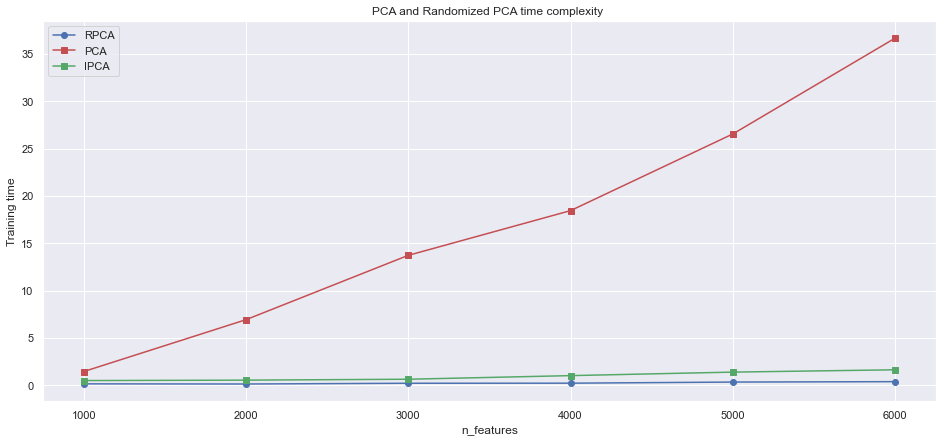

In [30]:
import time

times_rpca = []
times_pca = []
times_ipca=[]
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
n_batches = 100
for n_features in sizes:
    X = np.random.randn(2000, n_features) #creating the data
    
    # Randomized PCA
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    # Regular PCA
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)
    # Incremental PCA
    inc_pca = IncrementalPCA(n_components=2)
    t1 = time.time()
    for X_batch in np.array_split(X, n_batches):
        inc_pca.partial_fit(X_batch)
    X_reduced = inc_pca.transform(X)
    t2 = time.time()
    times_ipca.append(t2 - t1)

plt.figure(figsize=(16, 7))
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.plot(sizes, times_ipca, "g-s", label="IPCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

## Kernel PCA

Another variation of PCA is Kernal PCA in which we do not directly use linear transformation but use kernels to project the data into a space where we can have a linear decision boundary. The process of matrix decomposition into eigenvectors is a linear transformation process, in other words, we cannot use this process effectively for non-linearly separable data. Just like in the SVM, the idea behind kernel PCA is to take the data into a dimension in which we can have a linear decision boundary for separation. Then we apply the linear decomposition.


In PCA we calculate the covariance matrix by given:

$$C = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i \mathbf{x}_i^⊤$$


In Kernel PCA, we need to construct a kernel matrix by using the covariance matrix. Let's see how we can do that.

**1. Let's assume that we want to map our data into a feature space $\phi \left(x_1\right),...,\phi \:\left(x_i\right)$ where we have zero mean $\frac{1}{N}\sum _{i=1}^N\phi \left(x_i\right)=0$**

The covariance matrix of the mapped data would be given by the following:

$$(2)\:\: C=\:\frac{1}{N}\sum _{i=1}^N\phi \left(x_i\right)\cdot \phi \:\left(x_i\right)^T $$


and corresponding eigenvalues and eigenvectors are given by

$$(3)\:\:  Cv_k=\lambda _kv_k\:where\:k\:=\:1,2,3,...,M$$

2. **If we substitute equation 2 into equation 3 we get:**

$$(4)\:\: \frac{1}{N}\sum_{i=1}^N\phi\left(x_i\right)\cdot \:\left\{\phi \left(x_i\right)^Tv_k\right\}=\lambda _kv_k\:$$


$$v_k=\sum_{i=1}^N\left(a_{ki}\phi \:\left(x_i\right)\right)$$


Let's also substitute equation 4 into equation 2 and get:


$$(6)\:\:\:\frac{1}{N}\sum_{i=1}^N\phi \left(x_i\right)\cdot \phi \left(x_i\right)^T\sum_{j=1}^N\left(a_{kj}\phi \left(x_j\right)\right)=\lambda _k\sum_{i=1}^N\left(a_{ki}\phi\left(x_i\right)\right)$$


3. **Remember that the kernel function is defined as the following:**

$$K\left(x_i,x_j\right)=\phi \left(x_i\right)\phi \left(x_j\right)$$



4. **If we multiply both sides of the equation 6 by $\phi \left(x_l\right)^T$, we get:**

$$\:\frac{1}{N}\sum _{i=1}^NK\left(x_i,x_j\right)\sum_{j=1}^N\left(a_{kj}\:K\left(x_i,x_j\right)\right)=\lambda_k\sum _{i=1}^N\left(a_{ki}K\left(x_i,x_j\right)\right)$$

We can use the matrix notation to get a simplified version of the equation above

$$K^2a_{_k}=\lambda _kNKa_k$$ where $K_{i,j}=K\left(x_i,x_j\right)$ and $a_k$ is the column vector of $a_{ki}$

5. **We can find the column vector by the following:**

$$Ka_k=\lambda _kNa_k$$

where K is named Kernel Matrix and $\left|\left|a\right|\right|=1$


6. **and finally, we can calculate the kernel principal components by the following:**

$$(7)\:\: y_k\left(x\right)=\phi \left(x\right)^Tv_k=\sum _{i=1}^N\left(a_{ki}K\left(x_i,x_j\right)\right)$$

Hence, for extracting the principal components, we compute projections of the image of the data points $\phi \left(x\right)$ onto to the eigenvectors $v_k$ in a higher dimension R according to the function above (7).

An important thing to mention that we do not need to explicitly compute $\phi \left(x_i\right)$, in other words, we do not actually need to project our data to a higher dimension. Thanks to the kernel trick, we can directly construct the kernel matrix from the data set $x_i$ by calculating the dot products without actually mapping.

1. [Kernel Principal Component Analysis](https://people.eecs.berkeley.edu/~wainwrig/stat241b/scholkopf_kernel.pdf)
2. [Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models](https://arxiv.org/pdf/1207.3538.pdf)
3. [Statistical Machine Learning](http://www.tml.cs.uni-tuebingen.de/teaching/2020_statistical_learning/downloads_free/luxburg_statistical_learning_slides.pdf)
4. [Dimensionality reduction. PCA. Kernel PCA](https://www.cs.mcgill.ca/~dprecup/courses/ML/Lectures/ml-lecture13.pdf)
5. [Statistical Machine Learning Part 26 - Kernel PCA](https://www.youtube.com/watch?v=7kfkGyhPDu0)
6. [A TUTORIAL ON KERNEL PRINCIPAL COMPONENT ANALYSIS](https://atiulpin.wordpress.com/2015/04/02/a-tutorial-on-kernel-principal-component-analysis/)

Let's unwrap the Swiss role using Kernel PCA:

In [31]:
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.decomposition import KernelPCA

X, t = datasets.make_swiss_roll(n_samples=1500, noise=0.2,random_state=42)

I will use `KernelPCA()` with linear kernel to unwrap the Swiss role.

In [32]:
lnr_kPCA=KernelPCA(n_components = 3, kernel="linear", fit_inverse_transform=True)

In [33]:
X_reduced=lnr_kPCA.fit_transform(X)

I will use the first two principal components to visualize the reduced data.

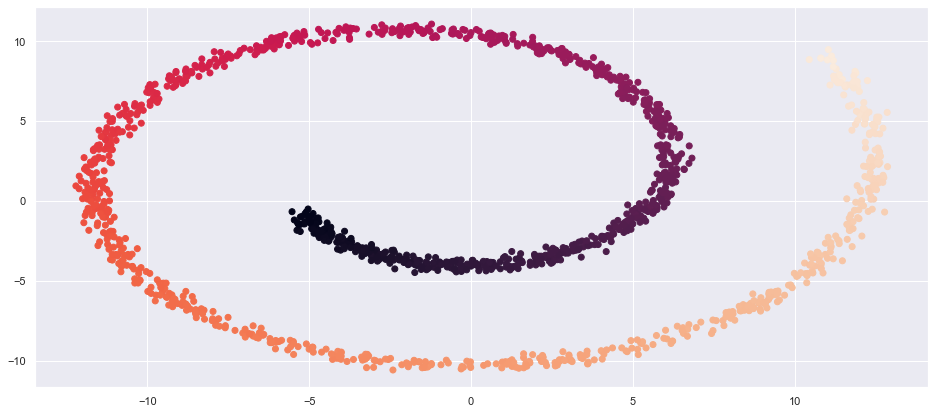

In [34]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)

Looks like Linear Kernel is suitable for the data we have. In addition to linear kernel, we can use kernels such as: RBF and Sigmoid. In addition, we can use the previous argument `svd_solver` with Kernel PCA as well. See the documentation for more about Kernel PCA: [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

Now let's apply reverse transformation.

In [35]:
X_inverse = lnr_kPCA.inverse_transform(X_reduced)

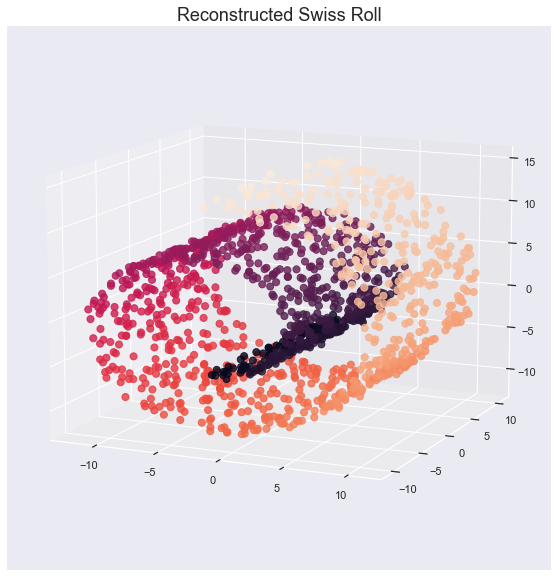

In [36]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, s=50, alpha=0.8
)
ax.set_title("Reconstructed Swiss Roll",fontsize=18)
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="",transform=ax.transAxes)    

Kernel PCA does not provide `explained_variance_ratio_` method, therefore, we need a way to measure goodnes of projection. One approach we can use is calculating reconstruction error and selecting the model that yields the lower reconstruction error. 

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_inverse)

38.27744026768

We can use `GridSearchCV()` for finding the hyperparameters (such as kernel) that minimizes the MSE above and use the model with the lowers error.